In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
mnistDB = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnistDB.load_data()

In [3]:
#Reshape Data
x_train = x_train.reshape(60000,28*28)
x_test = x_test.reshape(10000,28*28)

#Normalizing the data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

#Deep Learning Model
ML = keras.models.Sequential()

#Create Hidden layer 1 and input layer
ML.add(keras.layers.Dense(units = 50, activation = 'relu', input_shape = x_train.shape[1:]))
#Hidden layer 2
ML.add(keras.layers.Dense(units = 100, activation = 'relu'))
#Hidden layer
ML.add(keras.layers.Dense(units = 70, activation = 'relu'))
#Output layer
ML.add(keras.layers.Dense(units = 10, activation = 'softmax'))

#Summary of parameters of DNN
ML.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 70)                7070      
                                                                 
 dense_3 (Dense)             (None, 10)                710       
                                                                 
Total params: 52,130
Trainable params: 52,130
Non-trainable params: 0
_________________________________________________________________


313/313 [==============================] - 0s 1ms/step - loss: 0.1404 - accuracy: 0.9564


C:\Users\Administrator\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


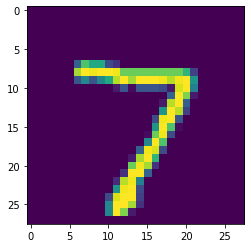

In [4]:
#Compile model
ML.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
ML.fit(x_train, y_train, epochs = 1, batch_size = 16)
test_loss, test_acc = ML.evaluate(x_test, y_test)

#Handwritten digit recognition
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
img = load_img('sample_image.png', grayscale = True, target_size = (28,28))
plt.imshow(img)

In [5]:
#Convert to array
img = img_to_array(img)

#Reshape into a single sample with 1 channel
img = img.reshape(1,28*28)

#Prepare pixel data
img = img.astype('float32')/255.0
digit = ML.predict(img)

print(f'Digit is {digit[0]}')

Digit is [2.0267478e-04 2.0012098e-05 1.9739566e-03 1.2970183e-03 1.8465146e-07
 2.0110110e-05 3.5472911e-09 9.9622983e-01 7.7562407e-05 1.7863126e-04]
